# How to Use Scikit-Learn (sklearn)

In [1]:
## Import required libraries
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Generate a Synthetic Dataset

In [2]:
## Generate three features
features = ['f1', 'f2', 'f3']

## Generate two samples with the three features
samples = [[ 1,  2,  3], [11, 12, 13]]

## Generate class labels for each of the two samples
labels = [0, 1]

print(type(features))
print(type(samples))
print(type(labels))

<class 'list'>
<class 'list'>
<class 'list'>


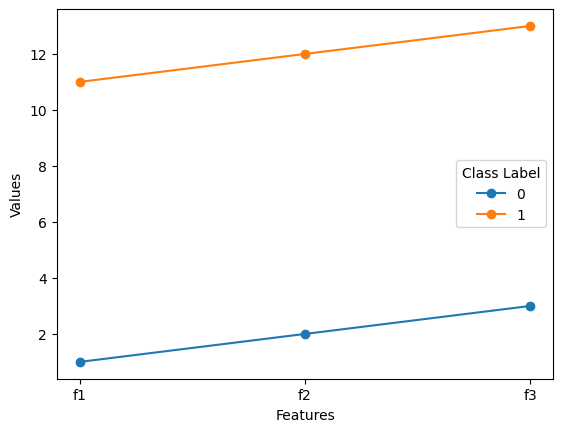

In [3]:
plt.plot(features, samples[0], marker='o', label=labels[0])
plt.plot(features, samples[1], marker='o', label=labels[1])
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title='Class Label')
plt.show()

## Train a Random Forest Classifier on the Synthetic Dataset

In [4]:
## Intialize a random forest classifier, one
## type of classification algorithms.
## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

In [5]:
## Train the classifier using the training dataset
clf.fit(samples, labels)

RandomForestClassifier(random_state=42)

## Test the Random Forest Classifier

In [6]:
testData = [[14, 15, 16], [4, 5, 6]]

## Predicted labels
predLabels = clf.predict(testData)

plt.plot(features, testData[0], marker='o', label=predLabels[0])
plt.plot(features, testData[1], marker='o', label=predLabels[1])
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title='Predicted Class Label')
plt.show()

## Investigate How the Classification Is Made

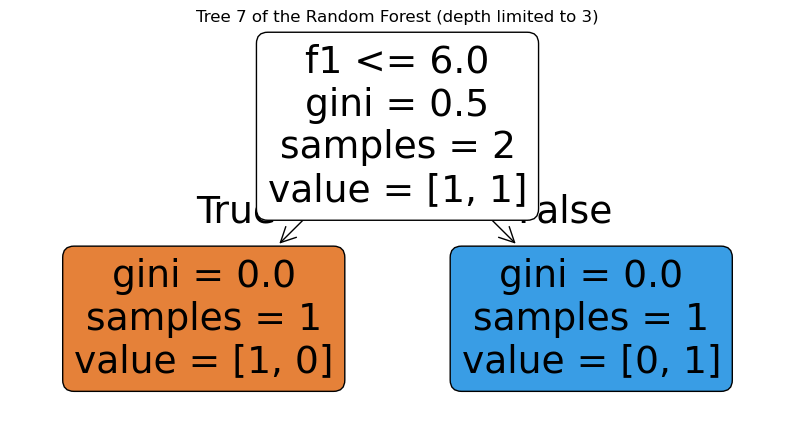

In [7]:
from sklearn.tree import plot_tree

# Pick one tree from the forest (e.g., the eighth one)
estimator = clf.estimators_[7]

# Plot the tree
plt.figure(figsize=(10, 5))
plot_tree(estimator, feature_names=features, filled=True, max_depth=2, rounded=True)
plt.title("Tree 7 of the Random Forest (depth limited to 3)")
plt.show()

A random forest classifier is a forest of 'decision trees'.  
Each decision tree is a sequence of True-False or Yes-No questions.  
Each True-False decision is considered as a split.  
The 'gini' (pronounced genie) index represents the quality of a split in a decision tree.  

Here, at the root node, the two input samples are asked the question whether f1 <= 6.0 or not.  
For one of the samples, the answer is true and, for the other sample, the answer is false.  
~~In the orange leaf node, "value = \[1, 0\]" implies that only the first sample belongs to that leaf.~~  
~~In the blue leaf node, "value = \[0, 1\]" implies that only the second sample belongs to that leaf.~~  
In the orange leaf node, "value = \[1, 0\]" implies that 1 sample belongs to class 0 and 0 samples belong to class 1.  
The length of 'value' is same as the number of classes.  
The i-th element in 'value' represents either the proportion or the absolute number of samples belonging to the i-th class.  
In the blue leaf node, "value = \[0, 1\]" implies that 0 samples belong to class 0 and 1 sample belong to class 1.

The variable 'samples' in a node represents the number of samples that have reached that node. 

When a test sample is presented to the random forest classifier, it forwards the test sample to each constituent decision tree.  
Each decision tree independently assigns a class label to the test sample.  
The random forest classifier then selects the class label that has been assigend by the majority of the decision trees and  
assigns that class label to the test sample.

It is similar to you making classification with a team of 100 people.  
You give all the training samples to each person.  
Each person figures out a pattern for detecting the class labels.  
For example, one person comes up with the strategy that, whenever f1<= 6, it is class 1.  
Another person comes up with the strategy that, whenever f3<= 8, it is class 1, and so on.  
Now, when you are given a test sample, you share it with all the 100 trained people.  
Each person applies the classification strategy he/she had come up with during training and let you know his/her predicted class label.  
You choose the class label predicted by the majority of them.

**Ref:** Understanding the decision tree structure: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html  

In [8]:
estimator.tree_.value

array([[[0.5, 0.5]],

       [[1. , 0. ]],

       [[0. , 1. ]]])

In [9]:
rf_params = clf.get_params()
print(type(rf_params))
print(f'The no. of decision trees in our randon forest classifier is: {rf_params['n_estimators']}')

<class 'dict'>
The no. of decision trees in our randon forest classifier is: 100


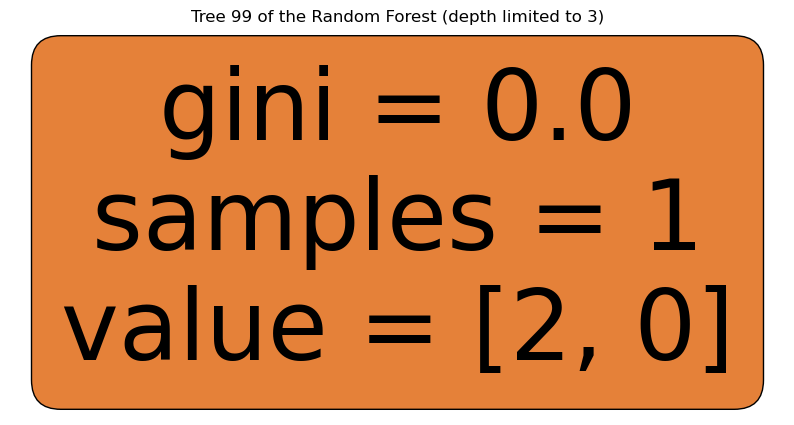

In [29]:
# Pick another tree from the forest (e.g., the 100th tree)
estimator = clf.estimators_[99]

# Plot the tree
plt.figure(figsize=(10, 5))
plot_tree(estimator, feature_names=features, filled=True, max_depth=2, rounded=True)
plt.title("Tree 99 of the Random Forest (depth limited to 3)")
plt.show()

A tree with a single node like this indicates that this tree could not find a suitable true-false question for creating a split.  
The 'value = [2, 0]' indicates that both the training samples have been assigned to class 0.  
**However, it is not clear why 'samples = 1' is mentioned. Should not it be 'samples = 2'?**

In [30]:
estimator.tree_.value

array([[[1., 0.]]])

In [27]:
type(estimator.tree_)

sklearn.tree._tree.Tree

In [23]:
import sklearn

help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the left chil

In [28]:
estimator.tree_.n_node_samples

array([1])

In [31]:
estimator.tree_.weighted_n_node_samples

array([2.])

**References:**      
https://scikit-learn.org/stable/getting_started.html  
Understanding the decision tree structure: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html  
https://www.geeksforgeeks.org/machine-learning/changing-colors-for-decision-tree-plot-using-sklearn-plot-tree/  